In [20]:
import pandas as pd 
import statsmodels.api as sm 
import numpy as np 
import statsmodels.stats.diagnostic as sms

In [2]:
data = pd.read_stata("Project6a.dta")

In [3]:
data

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473
...,...,...,...,...,...,...,...,...,...,...
168,WV,4,0,39,32.039001,152.270996,42,3.466954,5.025662,17.383217
169,WI,3,1,32,22.625999,359.800995,53,3.119100,5.885551,5.916420
170,WI,5,0,36,197.460007,1278.526001,36,5.285536,7.153463,13.378174
171,WI,7,0,38,202.591003,450.716003,46,5.311189,6.110837,31.010078


In [5]:
reg_data = data[["voteA", "prtystrA", "democA", "expendA", "expendB"]].dropna()

In [8]:
reg_data["ln(expendA)"] = np.log(reg_data["expendA"])
reg_data["ln(expendB)"] = np.log(reg_data["expendB"])

In [9]:
Y = reg_data["voteA"]
X = reg_data[["prtystrA", "democA", "ln(expendA)", "ln(expendB)"]]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()

In [11]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     169.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           8.09e-58
Time:                        19:42:20   Log-Likelihood:                -593.20
No. Observations:                 173   AIC:                             1196.
Df Residuals:                     168   BIC:                             1212.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.6614      4.736      7.952      

<AxesSubplot:xlabel='ln(expendA)', ylabel='model1_resid'>

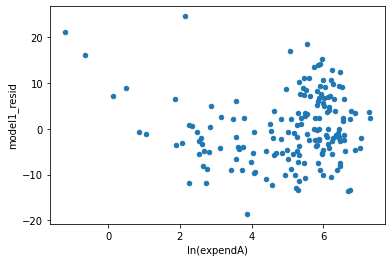

In [13]:
reg_data["model1_resid"] = model1.resid
reg_data.plot.scatter("ln(expendA)", "model1_resid")

<AxesSubplot:xlabel='ln(expendB)', ylabel='model1_resid'>

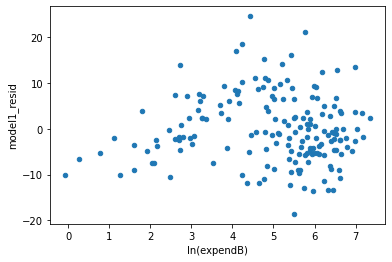

In [14]:
reg_data.plot.scatter("ln(expendB)", "model1_resid")

In [16]:
reg_data["uhat2"] = reg_data["model1_resid"] ** 2 
Y = reg_data["uhat2"]
X = reg_data[["prtystrA", "democA", "ln(expendA)", "ln(expendB)"]]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()

In [17]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  uhat2   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.330
Date:                Tue, 15 Nov 2022   Prob (F-statistic):             0.0581
Time:                        19:52:11   Log-Likelihood:                -1003.7
No. Observations:                 173   AIC:                             2017.
Df Residuals:                     168   BIC:                             2033.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         113.9635     50.815      2.243      

In [34]:
results = sms.het_breuschpagan(reg_data["model1_resid"], X)
names = names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
for name, result in zip(names, results): 
    print(name + " : " +str(result))

Lagrange multiplier statistic : 9.09335648663182
p-value : 0.05880790411089945
f-value : 2.330112826740832
f p-value : 0.058057501107011425


In [28]:
model2.nobs * model2.rsquared

9.09335648663182

In [37]:
vals = sms.het_white(reg_data["model1_resid"], X)
for name, val in zip(names, vals): 
    print(name + " : " + str(val))

Lagrange multiplier statistic : 31.101514031882367
p-value : 0.003258263798817313
f-value : 2.680757572966306
f p-value : 0.0019733265701193724


In [42]:
reg_data["yhat"] = model1.predict()

In [43]:
reg_data

,voteA,prtystrA,democA,expendA,expendB,ln(expendA),ln(expendB),model1_resid,uhat2,yhat
0,68,41,1,328.295990,8.737000,5.793916,2.167567,-3.746794,14.038468,71.746794
1,62,60,0,626.377014,402.476990,6.439952,5.997638,9.417434,88.688062,52.582566
2,73,55,1,99.607002,3.065000,4.601233,1.120048,-1.915028,3.667331,74.915028
3,69,64,0,319.690002,26.281000,5.767352,3.268846,2.275167,5.176383,66.724833
4,75,66,0,159.220993,60.054001,5.070293,4.095244,16.954775,287.464399,58.045225
...,...,...,...,...,...,...,...,...,...,...
168,39,42,0,32.039001,152.270996,3.466954,5.025662,2.070757,4.288033,36.929243
169,32,53,1,22.625999,359.800995,3.119100,5.885551,-4.119080,16.966819,36.119080
170,36,36,0,197.460007,1278.526001,5.285536,7.153463,3.345017,11.189138,32.654983
171,38,46,0,202.591003,450.716003,5.311189,6.110837,-3.826144,14.639379,41.826144


In [44]:
reg_data["yhat2"] = reg_data["yhat"] ** 2

In [45]:
Y = reg_data["uhat2"]
X = reg_data[["yhat", "yhat2"]]
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()

In [46]:
vals = sms.het_white(reg_data["model1_resid"], X)
for name, val in zip(names, vals): 
    print(name + " : " + str(val))

Lagrange multiplier statistic : 26.51121913099395
p-value : 2.4954432842136108e-05
f-value : 7.601068128879028
f p-value : 1.1853556822939143e-05
